### AdaBoost Ensemble Algorithm:-

1.  The main aim of this project is to predict whether the breast tumour cancer data record is either benign or malignant using AdaBoost Classifier Algorithm.

###  Steps Covered

1.  Importing all the necessary  Libraries

2.  Loading the Dataset

3.  Perform the Data Exploration

4.  Do Data Preprocessing 

5. Divide the dataset into independent and dependent features and feature scaling on the inputs

6. Splitting the Data into training and testing data

7.  Create Base Estimator

8.  Train AdaBoost Model

9.  Perform the Predictions

10. Do the Evaluation of the Algorithm

11. Get the Feature Importance

12. Predict whether the sample cancer data is malignant or benign

### Step 1:  Importing all the necessary  Libraries

In [1234]:
import   numpy                   as    np
import   pandas                  as    pd
import   matplotlib.pyplot       as    plt
import   seaborn                 as    sns

from     sklearn.datasets         import load_breast_cancer
from     sklearn.model_selection  import train_test_split
from     sklearn.preprocessing    import StandardScaler
from     sklearn.ensemble         import AdaBoostClassifier
from     sklearn.tree             import DecisionTreeClassifier
from     sklearn.metrics          import accuracy_score, confusion_matrix, classification_report

### Step 2:  Loading the Dataset

In [1235]:
data = load_breast_cancer()

In [1236]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [1237]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [1238]:
### Construct the datarame from the above dataset

df = pd.DataFrame(data.data, columns=data.feature_names)

In [1239]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [1240]:
### Add the target to the dataframe

df['target'] = data.target

In [1241]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### OBSERVATIONS:

1. The above dataset is the dataset for the breast cancer data which depicts about all the features for the breast cancer.

2. The output is the target which determines whether the breast cancer tumour data is Benign or Malignant.

    (a.)   Malignant ------------->   Cancerous data (1)


    (b.)   Benign    ------------->   Non Cancerous data (0)

### Step 3:   Perform the Data Exploration

In [1242]:
### display the top five rows of the dataset

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [1243]:
### display the bottom five records of the dataset

df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [1244]:
### get the length of the dataset

print("Total number of records in the dataset is:", len(df))

Total number of records in the dataset is: 569


In [1245]:
### shape of the dataset

df.shape

(569, 31)

In [1246]:
### get the columns used in the dataset

df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [1247]:
### get the information about the columns used in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### OBSERVATIONS:

1. All the input features of the brest cancer data is numerical in nature.

2. The output feature 'Target' is integer in nature.

In [1248]:
### depict the statistical summary about the dataset

df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### OBSERVATIONS:

1.  It depicts about the statistical summary about all the numerical features in the dataset.

### Step 4:  Do Data Preprocessing 

In [1249]:
### Check if there are any NULL Values in the dataset

df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

### OBSERVATIONS:

1.  There are no NULL Values in the dataset.

In [1250]:
### Check for any duplicate records in the dataset

df[df.duplicated()]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target


### OBSERVATIONS:

1.  There are no duplicate records in the dataset.

### Step 5:  Divide the dataset into independent and dependent features and feature scaling on the inputs

In [1251]:
X = df.drop(columns='target',axis=1)

Y = df['target']

In [1252]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [1253]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [1254]:
### Feature scaling on the inputs

from sklearn.preprocessing  import  StandardScaler

### create an object for standard scaler

sc = StandardScaler()

X_scaled = sc.fit_transform(X)

In [1255]:
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

### OBSERVATIONS:

1.  All the input features has been scaled in one range.

### Step 6:  Splitting the Data into training and testing data

In [1256]:
from  sklearn.model_selection  import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2,random_state=42)

In [1257]:
X_train

array([[-1.44798723, -0.45602336, -1.36665103, ...,  0.91959172,
         2.14719008,  1.85943247],
       [ 1.97750799,  1.69418666,  2.08961867, ...,  2.6752184 ,
         1.9368786 ,  2.46346488],
       [-1.40708919, -1.26351565, -1.34976305, ..., -0.97048581,
         0.61676962,  0.05287682],
       ...,
       [ 0.04621146, -0.57470379, -0.06874782, ..., -1.23756033,
        -0.71628161, -1.26047806],
       [-0.04183295,  0.07687501, -0.03497186, ...,  1.03683652,
         0.45013821,  1.19444266],
       [-0.5530585 ,  0.28631105, -0.60751564, ..., -0.61357437,
        -0.33448538, -0.84042616]])

In [1258]:
X_test

array([[-0.47069438, -0.16048584, -0.44810956, ..., -0.19956318,
         0.18320441,  0.19695794],
       [ 1.36687747,  0.47014935,  1.30288585, ...,  0.97897545,
        -0.56582801, -1.00057787],
       [ 0.37850807,  0.04429607,  0.40082046, ...,  0.56024403,
        -0.10314275, -0.20813168],
       ...,
       [-0.74050787, -1.01451947, -0.74550281, ..., -0.28209134,
        -0.3830188 , -0.3245049 ],
       [ 0.02633046,  1.99205126,  0.02393013, ..., -0.49358878,
        -1.63518099, -0.33170895],
       [ 1.87526288,  2.75300221,  1.80128727, ...,  0.78102969,
        -0.05299156, -0.0978542 ]])

In [1259]:
print("Shape of the input training data is:", X_train.shape)

print("Shape of the input testing  data is:", X_test.shape)

Shape of the input training data is: (455, 30)
Shape of the input testing  data is: (114, 30)


In [1260]:
Y_train

68     1
181    0
63     1
248    1
60     1
      ..
71     1
106    1
270    1
435    0
102    1
Name: target, Length: 455, dtype: int64

In [1261]:
Y_test

204    1
70     0
131    0
431    1
540    1
      ..
486    1
75     0
249    1
238    1
265    0
Name: target, Length: 114, dtype: int64

In [1262]:
print("Shape of the output training data is:", Y_train.shape)

print("Shape of the output testing  data is:", Y_test.shape)

Shape of the output training data is: (455,)
Shape of the output testing  data is: (114,)


### Step 7: Create Base Estimator

Adaboost works best with the decision tree stump (weak learner). It is the decision tree with one one depth.

In [1263]:
### Construct a decision tree with one depth

from sklearn.tree import DecisionTreeClassifier

bestestimators = DecisionTreeClassifier(
    max_depth= 1,
    random_state=42
)

### Step 8: Train AdaBoost Model

In [1264]:
### create an object for Adaboost

adamodel = AdaBoostClassifier(
    estimator= bestestimators          ,
    n_estimators= 100                  ,
    learning_rate=0.1                  ,
    random_state=42    
)

### train the adamodel model

adamodel.fit(X_train, Y_train)

c:\Users\DELL\Desktop\Complete_Data_Science\vens\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=42),
                   learning_rate=0.1, n_estimators=100, random_state=42)

### OBSERVATIONS:

1. The Adaboost classiier model is trained with the help of the training data using:-

   (a.)  Decision Tree ------------> A tree with only one depth.

### Step 9:  Perform the Predictions

In [1265]:
Y_pred = adamodel.predict(X_test)

In [1266]:
Y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

### Step 11: Do the Evaluation of the Algorithm

In [1267]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [1268]:
ac = accuracy_score(Y_test, Y_pred)

print("Accuracy of the model is:", (ac * 100.0))

Accuracy of the model is: 96.49122807017544


In [1269]:
cm = confusion_matrix(Y_test, Y_pred)

print("Conusion Matrix:", cm)

Conusion Matrix: [[40  3]
 [ 1 70]]


In [1270]:
cr = classification_report(Y_test, Y_pred)

In [1271]:
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### Step 11: Get the Feature Importance

[0.   0.11 0.   0.03 0.04 0.04 0.   0.05 0.02 0.   0.03 0.   0.   0.08
 0.   0.06 0.   0.   0.   0.   0.04 0.12 0.07 0.05 0.03 0.   0.07 0.12
 0.04 0.  ]


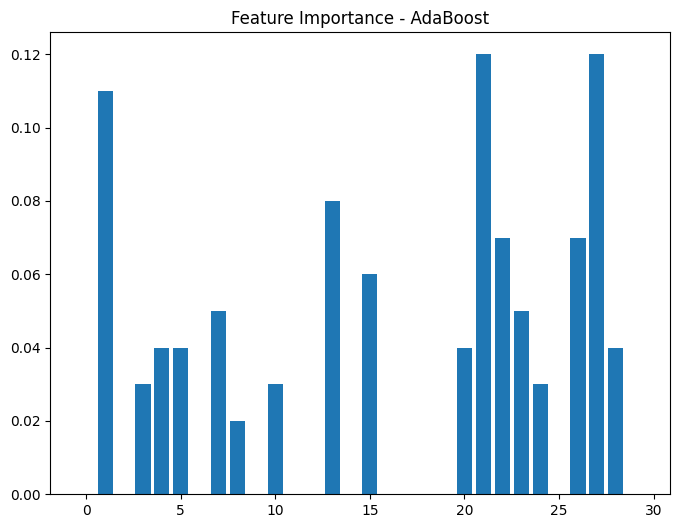

In [1272]:
feature_importance = adamodel.feature_importances_

print(feature_importance)


plt.figure(figsize=(8,6))
### perform the bar chart
plt.bar(range(len(feature_importance)), feature_importance)
### give the title o the bar chart
plt.title('Feature Importance - AdaBoost')

plt.show()

### OBSERVATIONS:

1. The bar chart depicts the feature importances for various features.

### Step 12: Predict whether the sample cancer data is malignant or benign

In [1273]:
### create a new sample data

new_sample = pd.DataFrame([[
    17.99, 10.38, 122.8, 1001.0, 0.1184,
    0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
    1.095, 0.9053, 8.589, 153.4, 0.006399,
    0.04904, 0.05373, 0.01587, 0.03003, 0.006193,
    25.38, 17.33, 184.6, 2019.0, 0.1622,
    0.6656, 0.7119, 0.2654, 0.4601, 0.1189
]], columns=X.columns)


In [1274]:
new_sample

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [1275]:
### using the standard scaler, transform the data

transformed_data = sc.transform(new_sample)

In [1276]:
transformed_data

array([[ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
         3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
         2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
         1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
         1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
         2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461]])

In [1277]:
### predict the new sample data

predictions = adamodel.predict(transformed_data)

In [1278]:
predictions[0]

np.int64(0)

In [1279]:
if(predictions == 1):
    print("\n Prediction : Malignant(Cancerous)")
else:
    print("\n Prediction : Benign (Non Cancerous)")


 Prediction : Benign (Non Cancerous)
